In [97]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import matplotlib.patches as mpatches
import numpy as np
import pickle
import sys

In [98]:
# data collection

loc = ['Central_Valley', 'Tennessee', 'Louisiana', 'Florida', 'Phoenix']  # ,    

ps = [224, 448, 672, 896, 1120]

m = ['BYOL', 'BarlowTwins', 'MoCo', 'SimCLR', 'SimSiam', 'Triplet', 'TripletBig']  # ,

clf = ['linear', 'xgboost', 'MLP', 'random_forest']

data_coll = {}

for location in loc:
    data_coll[location] = {}
    for classifier in clf:
        data_coll[location][classifier] = {}
        for model in m:
            accs = []
            for patch in ps:
                with open('/home/svkohler/OneDrive/Desktop/Masterthesis/Code/TrueForest/dump_pretrained/accuracies/'+model+'_'+str(patch)+'_test_accuracies_'+classifier+'.pkl', 'rb') as data:
                    d = pickle.load(data)
                    avg = []
                    for k in d.dict[location]:
                        v = d.dict[location][k]
                        avg.append(v[0])
                    std = np.std(avg)*100
                    avg = np.mean(avg)*100
                    accs.append((avg, std))
            data_coll[location][classifier][model] = accs
print(data_coll['Central_Valley']['linear'])
                    

{'BYOL': [(49.870525931336736, 0.24463049325504244), (50.18334550766983, 0.5374961153795136), (50.04687499999999, 0.8620818760840128), (49.5462962962963, 0.8899438612676064), (51.28061224489797, 1.1448256552526301)], 'BarlowTwins': [(49.83464207450693, 0.5124555276836311), (50.06135865595325, 0.6888994797353347), (49.640625, 0.7999328585106377), (50.64351851851852, 1.1001376418990965), (50.145408163265294, 1.4034113663286176)], 'MoCo': [(49.854912344777205, 0.2224978883259788), (50.048575602629654, 0.436967091887311), (50.284722222222236, 0.667452878417202), (49.41975308641975, 0.9927338515049206), (49.73979591836734, 1.148797879566561)], 'SimCLR': [(49.873630387143905, 0.2533441398566357), (50.03433162892623, 0.4060734563775419), (49.500868055555564, 0.7266174644017913), (49.973765432098766, 1.0065360909842704), (49.311224489795926, 1.2337553356473212)], 'SimSiam': [(49.81345872899928, 0.3649223845279297), (50.12235208181154, 0.5658208708691648), (49.826388888888886, 0.678195311966132

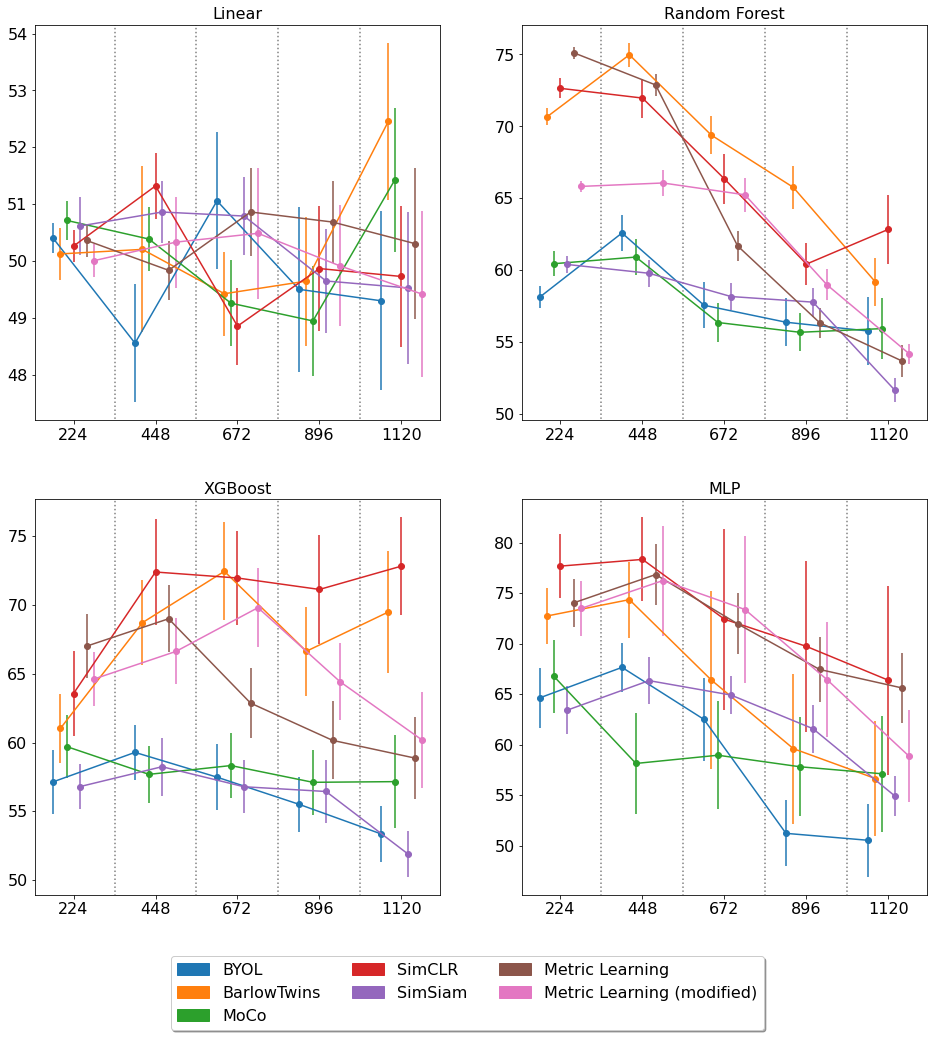

In [99]:
# plot test accuracies/F1 scores Central Valley

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False,
                                    figsize=(16, 16))

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', titlesize=16)
plt.rc('legend', fontsize=16)

BYOL = mpatches.Patch(color='#1f77b4', label='BYOL')
BarlowTwins = mpatches.Patch(color='#ff7f0e', label='BarlowTwins')
MoCo = mpatches.Patch(color='#2ca02c', label='MoCo')
SimCLR = mpatches.Patch(color='#d62728', label='SimCLR')
SimSiam = mpatches.Patch(color='#9467bd', label='SimSiam')
Metric_Learning = mpatches.Patch(color='#8c564b', label='Metric Learning')
Metric_Learning_mod = mpatches.Patch(color='#e377c2', label='Metric Learning (modified)')

fig.legend(handles=[BYOL, BarlowTwins, MoCo, SimCLR, SimSiam, Metric_Learning, Metric_Learning_mod], loc='lower center',
          ncol=3, fancybox=True, shadow=True)

LOC = 'Phoenix'
x = ['224', '448', '672', '896', '1120']


# linear
byol = [tup[0] for tup in data_coll[LOC]['linear']['BYOL']]
barlow = [tup[0] for tup in data_coll[LOC]['linear']['BarlowTwins']]
moco = [tup[0] for tup in data_coll[LOC]['linear']['MoCo']]
simclr = [tup[0] for tup in data_coll[LOC]['linear']['SimCLR']]
simsiam = [tup[0] for tup in data_coll[LOC]['linear']['SimSiam']]
baseline = [tup[0] for tup in data_coll[LOC]['linear']['Triplet']]
baseline_mod = [tup[0] for tup in data_coll[LOC]['linear']['TripletBig']]

byol_err = [tup[1] for tup in data_coll[LOC]['linear']['BYOL']]
barlow_err = [tup[1] for tup in data_coll[LOC]['linear']['BarlowTwins']]
moco_err = [tup[1] for tup in data_coll[LOC]['linear']['MoCo']]
simclr_err = [tup[1] for tup in data_coll[LOC]['linear']['SimCLR']]
simsiam_err = [tup[1] for tup in data_coll[LOC]['linear']['SimSiam']]
baseline_err = [tup[1] for tup in data_coll[LOC]['linear']['Triplet']]
baseline_mod_err = [tup[1] for tup in data_coll[LOC]['linear']['TripletBig']]


axs[0,0].set_title('Linear')
axs[0,0].vlines([0.5, 1.5,2.5,3.5], 0, 100, colors='grey', linestyle='dotted')
trans = Affine2D().translate(-0.25, 0.0) + axs[0,0].transData
axs[0,0].errorbar(x, byol, yerr=byol_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.16, 0.0) + axs[0,0].transData
axs[0,0].errorbar(x, barlow, yerr=barlow_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.08, 0.0) + axs[0,0].transData
axs[0,0].errorbar(x, moco, yerr=moco_err, transform=trans, marker='o')
axs[0,0].errorbar(x, simclr, yerr=simclr_err, marker='o')
trans = Affine2D().translate(0.08, 0.0) + axs[0,0].transData
axs[0,0].errorbar(x, simsiam, yerr=simsiam_err, transform=trans, marker='o')
trans = Affine2D().translate(0.16, 0.0) + axs[0,0].transData
axs[0,0].errorbar(x, baseline, yerr=baseline_err, transform=trans, marker='o')
trans = Affine2D().translate(0.25, 0.0) + axs[0,0].transData
axs[0,0].errorbar(x, baseline_mod, yerr=baseline_mod_err, transform=trans, marker='o')

# xgboost
byol = [tup[0] for tup in data_coll[LOC]['xgboost']['BYOL']]
barlow = [tup[0] for tup in data_coll[LOC]['xgboost']['BarlowTwins']]
moco = [tup[0] for tup in data_coll[LOC]['xgboost']['MoCo']]
simclr = [tup[0] for tup in data_coll[LOC]['xgboost']['SimCLR']]
simsiam = [tup[0] for tup in data_coll[LOC]['xgboost']['SimSiam']]
baseline = [tup[0] for tup in data_coll[LOC]['xgboost']['Triplet']]
baseline_mod = [tup[0] for tup in data_coll[LOC]['xgboost']['TripletBig']]

byol_err = [tup[1] for tup in data_coll[LOC]['xgboost']['BYOL']]
barlow_err = [tup[1] for tup in data_coll[LOC]['xgboost']['BarlowTwins']]
moco_err = [tup[1] for tup in data_coll[LOC]['xgboost']['MoCo']]
simclr_err = [tup[1] for tup in data_coll[LOC]['xgboost']['SimCLR']]
simsiam_err = [tup[1] for tup in data_coll[LOC]['xgboost']['SimSiam']]
baseline_err = [tup[1] for tup in data_coll[LOC]['xgboost']['Triplet']]
baseline_mod_err = [tup[1] for tup in data_coll[LOC]['xgboost']['TripletBig']]


axs[1,0].set_title('XGBoost')
axs[1,0].vlines([0.5, 1.5,2.5,3.5], 0, 100, colors='grey', linestyle='dotted')
trans = Affine2D().translate(-0.25, 0.0) + axs[1,0].transData
axs[1,0].errorbar(x, byol, yerr=byol_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.16, 0.0) + axs[1,0].transData
axs[1,0].errorbar(x, barlow, yerr=barlow_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.08, 0.0) + axs[1,0].transData
axs[1,0].errorbar(x, moco, yerr=moco_err, transform=trans, marker='o')
axs[1,0].errorbar(x, simclr, yerr=simclr_err, marker='o')
trans = Affine2D().translate(0.08, 0.0) + axs[1,0].transData
axs[1,0].errorbar(x, simsiam, yerr=simsiam_err, transform=trans, marker='o')
trans = Affine2D().translate(0.16, 0.0) + axs[1,0].transData
axs[1,0].errorbar(x, baseline, yerr=baseline_err, transform=trans, marker='o')
trans = Affine2D().translate(0.25, 0.0) + axs[1,0].transData
axs[1,0].errorbar(x, baseline_mod, yerr=baseline_mod_err, transform=trans, marker='o')

# MLP
byol = [tup[0] for tup in data_coll[LOC]['MLP']['BYOL']]
barlow = [tup[0] for tup in data_coll[LOC]['MLP']['BarlowTwins']]
moco = [tup[0] for tup in data_coll[LOC]['MLP']['MoCo']]
simclr = [tup[0] for tup in data_coll[LOC]['MLP']['SimCLR']]
simsiam = [tup[0] for tup in data_coll[LOC]['MLP']['SimSiam']]
baseline = [tup[0] for tup in data_coll[LOC]['MLP']['Triplet']]
baseline_mod = [tup[0] for tup in data_coll[LOC]['MLP']['TripletBig']]

byol_err = [tup[1] for tup in data_coll[LOC]['MLP']['BYOL']]
barlow_err = [tup[1] for tup in data_coll[LOC]['MLP']['BarlowTwins']]
moco_err = [tup[1] for tup in data_coll[LOC]['MLP']['MoCo']]
simclr_err = [tup[1] for tup in data_coll[LOC]['MLP']['SimCLR']]
simsiam_err = [tup[1] for tup in data_coll[LOC]['MLP']['SimSiam']]
baseline_err = [tup[1] for tup in data_coll[LOC]['MLP']['Triplet']]
baseline_mod_err = [tup[1] for tup in data_coll[LOC]['MLP']['TripletBig']]


axs[1,1].set_title('MLP')
axs[1,1].vlines([0.5, 1.5,2.5,3.5], 0, 110, colors='grey', linestyle='dotted')
trans = Affine2D().translate(-0.25, 0.0) + axs[1,1].transData
axs[1,1].errorbar(x, byol, yerr=byol_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.16, 0.0) + axs[1,1].transData
axs[1,1].errorbar(x, barlow, yerr=barlow_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.08, 0.0) + axs[1,1].transData
axs[1,1].errorbar(x, moco, yerr=moco_err, transform=trans, marker='o')
axs[1,1].errorbar(x, simclr, yerr=simclr_err, marker='o')
trans = Affine2D().translate(0.08, 0.0) + axs[1,1].transData
axs[1,1].errorbar(x, simsiam, yerr=simsiam_err, transform=trans, marker='o')
trans = Affine2D().translate(0.16, 0.0) + axs[1,1].transData
axs[1,1].errorbar(x, baseline, yerr=baseline_err, transform=trans, marker='o')
trans = Affine2D().translate(0.25, 0.0) + axs[1,1].transData
axs[1,1].errorbar(x, baseline_mod, yerr=baseline_mod_err, transform=trans, marker='o')


# random_forest
byol = [tup[0] for tup in data_coll[LOC]['random_forest']['BYOL']]
barlow = [tup[0] for tup in data_coll[LOC]['random_forest']['BarlowTwins']]
moco = [tup[0] for tup in data_coll[LOC]['random_forest']['MoCo']]
simclr = [tup[0] for tup in data_coll[LOC]['random_forest']['SimCLR']]
simsiam = [tup[0] for tup in data_coll[LOC]['random_forest']['SimSiam']]
baseline = [tup[0] for tup in data_coll[LOC]['random_forest']['Triplet']]
baseline_mod = [tup[0] for tup in data_coll[LOC]['random_forest']['TripletBig']]

byol_err = [tup[1] for tup in data_coll[LOC]['random_forest']['BYOL']]
barlow_err = [tup[1] for tup in data_coll[LOC]['random_forest']['BarlowTwins']]
moco_err = [tup[1] for tup in data_coll[LOC]['random_forest']['MoCo']]
simclr_err = [tup[1] for tup in data_coll[LOC]['random_forest']['SimCLR']]
simsiam_err = [tup[1] for tup in data_coll[LOC]['random_forest']['SimSiam']]
baseline_err = [tup[1] for tup in data_coll[LOC]['random_forest']['Triplet']]
baseline_mod_err = [tup[1] for tup in data_coll[LOC]['random_forest']['TripletBig']]


axs[0,1].set_title('Random Forest')
axs[0,1].vlines([0.5, 1.5,2.5,3.5], 0, 100, colors='grey', linestyle='dotted')
trans = Affine2D().translate(-0.25, 0.0) + axs[0,1].transData
axs[0,1].errorbar(x, byol, yerr=byol_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.16, 0.0) + axs[0,1].transData
axs[0,1].errorbar(x, barlow, yerr=barlow_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.08, 0.0) + axs[0,1].transData
axs[0,1].errorbar(x, moco, yerr=moco_err, transform=trans, marker='o')
axs[0,1].errorbar(x, simclr, yerr=simclr_err, marker='o')
trans = Affine2D().translate(0.08, 0.0) + axs[0,1].transData
axs[0,1].errorbar(x, simsiam, yerr=simsiam_err, transform=trans, marker='o')
trans = Affine2D().translate(0.16, 0.0) + axs[0,1].transData
axs[0,1].errorbar(x, baseline, yerr=baseline_err, transform=trans, marker='o')
trans = Affine2D().translate(0.25, 0.0) + axs[0,1].transData
axs[0,1].errorbar(x, baseline_mod, yerr=baseline_mod_err, transform=trans, marker='o')
plt.show()


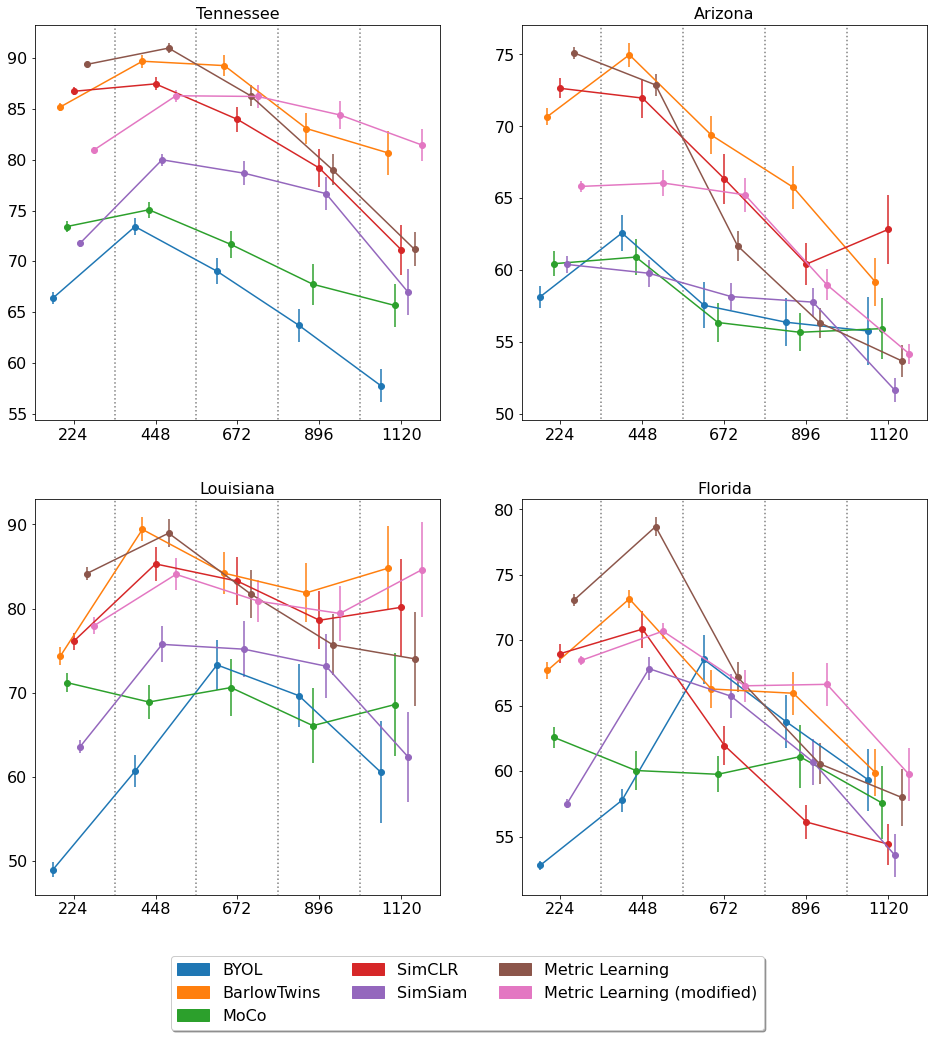

In [100]:
# plot test accuracies for OOD

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False,
                                    figsize=(16, 16))

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', titlesize=16)
plt.rc('legend', fontsize=16)

BYOL = mpatches.Patch(color='#1f77b4', label='BYOL')
BarlowTwins = mpatches.Patch(color='#ff7f0e', label='BarlowTwins')
MoCo = mpatches.Patch(color='#2ca02c', label='MoCo')
SimCLR = mpatches.Patch(color='#d62728', label='SimCLR')
SimSiam = mpatches.Patch(color='#9467bd', label='SimSiam')
Metric_Learning = mpatches.Patch(color='#8c564b', label='Metric Learning')
Metric_Learning_mod = mpatches.Patch(color='#e377c2', label='Metric Learning (modified)')

fig.legend(handles=[BYOL, BarlowTwins, MoCo, SimCLR, SimSiam, Metric_Learning, Metric_Learning_mod], loc='lower center',
          ncol=3, fancybox=True, shadow=True)


CLF = 'random_forest'
x = ['224', '448', '672', '896', '1120']


# Tennessee
LOC = 'Tennessee'
byol = [tup[0] for tup in data_coll[LOC][CLF]['BYOL']]
barlow = [tup[0] for tup in data_coll[LOC][CLF]['BarlowTwins']]
moco = [tup[0] for tup in data_coll[LOC][CLF]['MoCo']]
simclr = [tup[0] for tup in data_coll[LOC][CLF]['SimCLR']]
simsiam = [tup[0] for tup in data_coll[LOC][CLF]['SimSiam']]
baseline = [tup[0] for tup in data_coll[LOC][CLF]['Triplet']]
baseline_mod = [tup[0] for tup in data_coll[LOC][CLF]['TripletBig']]

byol_err = [tup[1] for tup in data_coll[LOC][CLF]['BYOL']]
barlow_err = [tup[1] for tup in data_coll[LOC][CLF]['BarlowTwins']]
moco_err = [tup[1] for tup in data_coll[LOC][CLF]['MoCo']]
simclr_err = [tup[1] for tup in data_coll[LOC][CLF]['SimCLR']]
simsiam_err = [tup[1] for tup in data_coll[LOC][CLF]['SimSiam']]
baseline_err = [tup[1] for tup in data_coll[LOC][CLF]['Triplet']]
baseline_mod_err = [tup[1] for tup in data_coll[LOC][CLF]['TripletBig']]

axs[0,0].set_title('Tennessee')
axs[0,0].vlines([0.5, 1.5,2.5,3.5], 0, 100, colors='grey', linestyle='dotted')
trans = Affine2D().translate(-0.25, 0.0) + axs[0,0].transData
axs[0,0].errorbar(x, byol, yerr=byol_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.16, 0.0) + axs[0,0].transData
axs[0,0].errorbar(x, barlow, yerr=barlow_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.08, 0.0) + axs[0,0].transData
axs[0,0].errorbar(x, moco, yerr=moco_err, transform=trans, marker='o')
axs[0,0].errorbar(x, simclr, yerr=simclr_err, marker='o')
trans = Affine2D().translate(0.08, 0.0) + axs[0,0].transData
axs[0,0].errorbar(x, simsiam, yerr=simsiam_err, transform=trans, marker='o')
trans = Affine2D().translate(0.16, 0.0) + axs[0,0].transData
axs[0,0].errorbar(x, baseline, yerr=baseline_err, transform=trans, marker='o')
trans = Affine2D().translate(0.25, 0.0) + axs[0,0].transData
axs[0,0].errorbar(x, baseline_mod, yerr=baseline_mod_err, transform=trans, marker='o')

# Louisiana
LOC = 'Louisiana'
byol = [tup[0] for tup in data_coll[LOC][CLF]['BYOL']]
barlow = [tup[0] for tup in data_coll[LOC][CLF]['BarlowTwins']]
moco = [tup[0] for tup in data_coll[LOC][CLF]['MoCo']]
simclr = [tup[0] for tup in data_coll[LOC][CLF]['SimCLR']]
simsiam = [tup[0] for tup in data_coll[LOC][CLF]['SimSiam']]
baseline = [tup[0] for tup in data_coll[LOC][CLF]['Triplet']]
baseline_mod = [tup[0] for tup in data_coll[LOC][CLF]['TripletBig']]

byol_err = [tup[1] for tup in data_coll[LOC][CLF]['BYOL']]
barlow_err = [tup[1] for tup in data_coll[LOC][CLF]['BarlowTwins']]
moco_err = [tup[1] for tup in data_coll[LOC][CLF]['MoCo']]
simclr_err = [tup[1] for tup in data_coll[LOC][CLF]['SimCLR']]
simsiam_err = [tup[1] for tup in data_coll[LOC][CLF]['SimSiam']]
baseline_err = [tup[1] for tup in data_coll[LOC][CLF]['Triplet']]
baseline_mod_err = [tup[1] for tup in data_coll[LOC][CLF]['TripletBig']]

axs[1,0].set_title('Louisiana')
axs[1,0].vlines([0.5, 1.5,2.5,3.5], 0, 100, colors='grey', linestyle='dotted')
trans = Affine2D().translate(-0.25, 0.0) + axs[1,0].transData
axs[1,0].errorbar(x, byol, yerr=byol_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.16, 0.0) + axs[1,0].transData
axs[1,0].errorbar(x, barlow, yerr=barlow_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.08, 0.0) + axs[1,0].transData
axs[1,0].errorbar(x, moco, yerr=moco_err, transform=trans, marker='o')
axs[1,0].errorbar(x, simclr, yerr=simclr_err, marker='o')
trans = Affine2D().translate(0.08, 0.0) + axs[1,0].transData
axs[1,0].errorbar(x, simsiam, yerr=simsiam_err, transform=trans, marker='o')
trans = Affine2D().translate(0.16, 0.0) + axs[1,0].transData
axs[1,0].errorbar(x, baseline, yerr=baseline_err, transform=trans, marker='o')
trans = Affine2D().translate(0.25, 0.0) + axs[1,0].transData
axs[1,0].errorbar(x, baseline_mod, yerr=baseline_mod_err, transform=trans, marker='o')

# Florida
LOC = 'Florida'
byol = [tup[0] for tup in data_coll[LOC][CLF]['BYOL']]
barlow = [tup[0] for tup in data_coll[LOC][CLF]['BarlowTwins']]
moco = [tup[0] for tup in data_coll[LOC][CLF]['MoCo']]
simclr = [tup[0] for tup in data_coll[LOC][CLF]['SimCLR']]
simsiam = [tup[0] for tup in data_coll[LOC][CLF]['SimSiam']]
baseline = [tup[0] for tup in data_coll[LOC][CLF]['Triplet']]
baseline_mod = [tup[0] for tup in data_coll[LOC][CLF]['TripletBig']]

byol_err = [tup[1] for tup in data_coll[LOC][CLF]['BYOL']]
barlow_err = [tup[1] for tup in data_coll[LOC][CLF]['BarlowTwins']]
moco_err = [tup[1] for tup in data_coll[LOC][CLF]['MoCo']]
simclr_err = [tup[1] for tup in data_coll[LOC][CLF]['SimCLR']]
simsiam_err = [tup[1] for tup in data_coll[LOC][CLF]['SimSiam']]
baseline_err = [tup[1] for tup in data_coll[LOC][CLF]['Triplet']]
baseline_mod_err = [tup[1] for tup in data_coll[LOC][CLF]['TripletBig']]


axs[1,1].set_title('Florida')
axs[1,1].vlines([0.5, 1.5,2.5,3.5], 0, 100, colors='grey', linestyle='dotted')
trans = Affine2D().translate(-0.25, 0.0) + axs[1,1].transData
axs[1,1].errorbar(x, byol, yerr=byol_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.16, 0.0) + axs[1,1].transData
axs[1,1].errorbar(x, barlow, yerr=barlow_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.08, 0.0) + axs[1,1].transData
axs[1,1].errorbar(x, moco, yerr=moco_err, transform=trans, marker='o')
axs[1,1].errorbar(x, simclr, yerr=simclr_err, marker='o')
trans = Affine2D().translate(0.08, 0.0) + axs[1,1].transData
axs[1,1].errorbar(x, simsiam, yerr=simsiam_err, transform=trans, marker='o')
trans = Affine2D().translate(0.16, 0.0) + axs[1,1].transData
axs[1,1].errorbar(x, baseline, yerr=baseline_err, transform=trans, marker='o')
trans = Affine2D().translate(0.25, 0.0) + axs[1,1].transData
axs[1,1].errorbar(x, baseline_mod, yerr=baseline_mod_err, transform=trans, marker='o')


# Arizona
LOC = 'Phoenix'
byol = [tup[0] for tup in data_coll[LOC][CLF]['BYOL']]
barlow = [tup[0] for tup in data_coll[LOC][CLF]['BarlowTwins']]
moco = [tup[0] for tup in data_coll[LOC][CLF]['MoCo']]
simclr = [tup[0] for tup in data_coll[LOC][CLF]['SimCLR']]
simsiam = [tup[0] for tup in data_coll[LOC][CLF]['SimSiam']]
baseline = [tup[0] for tup in data_coll[LOC][CLF]['Triplet']]
baseline_mod = [tup[0] for tup in data_coll[LOC][CLF]['TripletBig']]

byol_err = [tup[1] for tup in data_coll[LOC][CLF]['BYOL']]
barlow_err = [tup[1] for tup in data_coll[LOC][CLF]['BarlowTwins']]
moco_err = [tup[1] for tup in data_coll[LOC][CLF]['MoCo']]
simclr_err = [tup[1] for tup in data_coll[LOC][CLF]['SimCLR']]
simsiam_err = [tup[1] for tup in data_coll[LOC][CLF]['SimSiam']]
baseline_err = [tup[1] for tup in data_coll[LOC][CLF]['Triplet']]
baseline_mod_err = [tup[1] for tup in data_coll[LOC][CLF]['TripletBig']]


axs[0,1].set_title('Arizona')
axs[0,1].vlines([0.5, 1.5,2.5,3.5], 0, 100, colors='grey', linestyle='dotted')
trans = Affine2D().translate(-0.25, 0.0) + axs[0,1].transData
axs[0,1].errorbar(x, byol, yerr=byol_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.16, 0.0) + axs[0,1].transData
axs[0,1].errorbar(x, barlow, yerr=barlow_err, transform=trans, marker='o')
trans = Affine2D().translate(-0.08, 0.0) + axs[0,1].transData
axs[0,1].errorbar(x, moco, yerr=moco_err, transform=trans, marker='o')
axs[0,1].errorbar(x, simclr, yerr=simclr_err, marker='o')
trans = Affine2D().translate(0.08, 0.0) + axs[0,1].transData
axs[0,1].errorbar(x, simsiam, yerr=simsiam_err, transform=trans, marker='o')
trans = Affine2D().translate(0.16, 0.0) + axs[0,1].transData
axs[0,1].errorbar(x, baseline, yerr=baseline_err, transform=trans, marker='o')
trans = Affine2D().translate(0.25, 0.0) + axs[0,1].transData
axs[0,1].errorbar(x, baseline_mod, yerr=baseline_mod_err, transform=trans, marker='o')
plt.show()

In [101]:
# data collection

loc = ['Central_Valley', 'Tennessee', 'Louisiana', 'Florida', 'Phoenix']  # ,    

ps = [224, 448, 672, 896, 1120]

m = ['BYOL', 'BarlowTwins', 'MoCo', 'SimCLR', 'SimSiam', 'Triplet', 'TripletBig']  # ,

data_coll = {}

for location in loc:
    data_coll[location] = {}
    for model in m:
        data_coll[location][model] = {}
        accs = []
        for patch in ps:
            with open('/home/svkohler/OneDrive/Desktop/Masterthesis/Code/TrueForest/dump_pretrained/similarities_raw/'+model+'_similarities_test'+'_'+str(patch)+'_'+location+'.json', 'rb') as data:
                d = pickle.load(data)
            data_coll[location][model][patch] = d

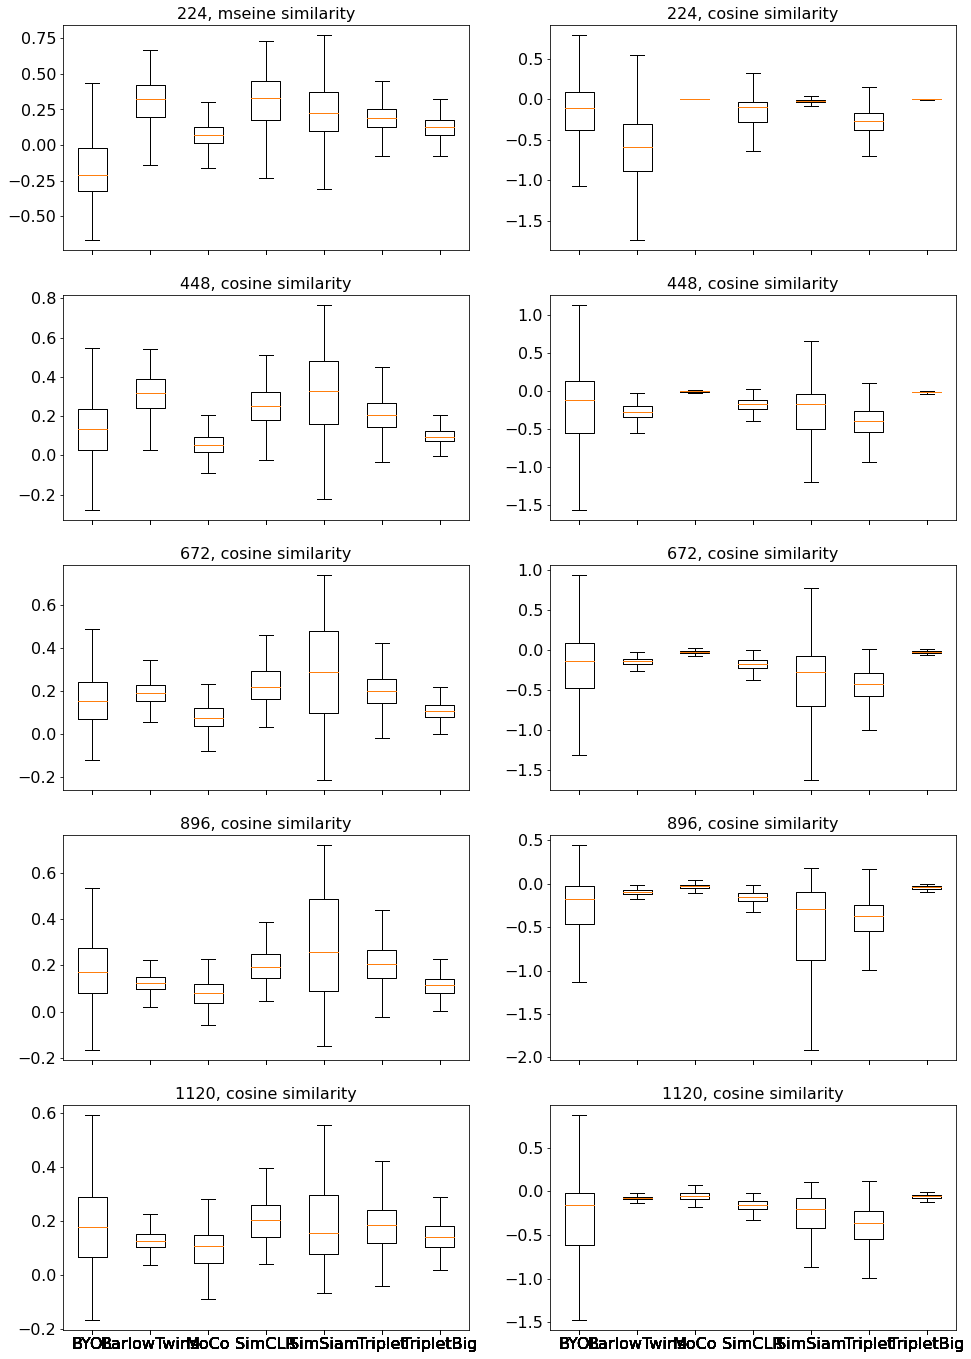

In [102]:
# plot test accuracies for OOD

fig, axs = plt.subplots(nrows=5, ncols=2, sharex=True,
                                    figsize=(16, 24))

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', titlesize=16) 

LOC = 'Central_Valley'

# Cos sim

PATCH = 224
axs[0,0].set_title('224, mseine similarity')
axs[0,0].boxplot([
    data_coll[LOC]['BYOL'][PATCH]['positive']['mse']-data_coll[LOC]['BYOL'][PATCH]['negative']['cos'],
    data_coll[LOC]['BarlowTwins'][PATCH]['positive']['cos']-data_coll[LOC]['BarlowTwins'][PATCH]['negative']['cos'],
    data_coll[LOC]['MoCo'][PATCH]['positive']['cos']-data_coll[LOC]['MoCo'][PATCH]['negative']['cos'],
    data_coll[LOC]['SimCLR'][PATCH]['positive']['cos']-data_coll[LOC]['SimCLR'][PATCH]['negative']['cos'],
    data_coll[LOC]['SimSiam'][PATCH]['positive']['cos']-data_coll[LOC]['SimSiam'][PATCH]['negative']['cos'],
    data_coll[LOC]['Triplet'][PATCH]['positive']['cos']-data_coll[LOC]['Triplet'][PATCH]['negative']['cos'],
    data_coll[LOC]['TripletBig'][PATCH]['positive']['cos']-data_coll[LOC]['TripletBig'][PATCH]['negative']['cos']
], labels=['BYOL', 'BarlowTwins', 'MoCo', 'SimCLR', 'SimSiam', 'Triplet', 'TripletBig'] , sym='')

PATCH = 448
axs[1,0].set_title('448, cosine similarity')
axs[1,0].boxplot([
    data_coll[LOC]['BYOL'][PATCH]['positive']['cos']-data_coll[LOC]['BYOL'][PATCH]['negative']['cos'],
    data_coll[LOC]['BarlowTwins'][PATCH]['positive']['cos']-data_coll[LOC]['BarlowTwins'][PATCH]['negative']['cos'],
    data_coll[LOC]['MoCo'][PATCH]['positive']['cos']-data_coll[LOC]['MoCo'][PATCH]['negative']['cos'],
    data_coll[LOC]['SimCLR'][PATCH]['positive']['cos']-data_coll[LOC]['SimCLR'][PATCH]['negative']['cos'],
    data_coll[LOC]['SimSiam'][PATCH]['positive']['cos']-data_coll[LOC]['SimSiam'][PATCH]['negative']['cos'],
    data_coll[LOC]['Triplet'][PATCH]['positive']['cos']-data_coll[LOC]['Triplet'][PATCH]['negative']['cos'],
    data_coll[LOC]['TripletBig'][PATCH]['positive']['cos']-data_coll[LOC]['TripletBig'][PATCH]['negative']['cos']
], labels=['BYOL', 'BarlowTwins', 'MoCo', 'SimCLR', 'SimSiam', 'Triplet', 'TripletBig'] , sym='')

PATCH = 672
axs[2,0].set_title('672, cosine similarity')
axs[2,0].boxplot([
    data_coll[LOC]['BYOL'][PATCH]['positive']['cos']-data_coll[LOC]['BYOL'][PATCH]['negative']['cos'],
    data_coll[LOC]['BarlowTwins'][PATCH]['positive']['cos']-data_coll[LOC]['BarlowTwins'][PATCH]['negative']['cos'],
    data_coll[LOC]['MoCo'][PATCH]['positive']['cos']-data_coll[LOC]['MoCo'][PATCH]['negative']['cos'],
    data_coll[LOC]['SimCLR'][PATCH]['positive']['cos']-data_coll[LOC]['SimCLR'][PATCH]['negative']['cos'],
    data_coll[LOC]['SimSiam'][PATCH]['positive']['cos']-data_coll[LOC]['SimSiam'][PATCH]['negative']['cos'],
    data_coll[LOC]['Triplet'][PATCH]['positive']['cos']-data_coll[LOC]['Triplet'][PATCH]['negative']['cos'],
    data_coll[LOC]['TripletBig'][PATCH]['positive']['cos']-data_coll[LOC]['TripletBig'][PATCH]['negative']['cos']
], labels=['BYOL', 'BarlowTwins', 'MoCo', 'SimCLR', 'SimSiam', 'Triplet', 'TripletBig'] , sym='')

PATCH = 896
axs[3,0].set_title('896, cosine similarity')
axs[3,0].boxplot([
    data_coll[LOC]['BYOL'][PATCH]['positive']['cos']-data_coll[LOC]['BYOL'][PATCH]['negative']['cos'],
    data_coll[LOC]['BarlowTwins'][PATCH]['positive']['cos']-data_coll[LOC]['BarlowTwins'][PATCH]['negative']['cos'],
    data_coll[LOC]['MoCo'][PATCH]['positive']['cos']-data_coll[LOC]['MoCo'][PATCH]['negative']['cos'],
    data_coll[LOC]['SimCLR'][PATCH]['positive']['cos']-data_coll[LOC]['SimCLR'][PATCH]['negative']['cos'],
    data_coll[LOC]['SimSiam'][PATCH]['positive']['cos']-data_coll[LOC]['SimSiam'][PATCH]['negative']['cos'],
    data_coll[LOC]['Triplet'][PATCH]['positive']['cos']-data_coll[LOC]['Triplet'][PATCH]['negative']['cos'],
    data_coll[LOC]['TripletBig'][PATCH]['positive']['cos']-data_coll[LOC]['TripletBig'][PATCH]['negative']['cos']
], labels=['BYOL', 'BarlowTwins', 'MoCo', 'SimCLR', 'SimSiam', 'Triplet', 'TripletBig'] , sym='')

PATCH = 1120
axs[4,0].set_title('1120, cosine similarity')
axs[4,0].boxplot([
    data_coll[LOC]['BYOL'][PATCH]['positive']['cos']-data_coll[LOC]['BYOL'][PATCH]['negative']['cos'],
    data_coll[LOC]['BarlowTwins'][PATCH]['positive']['cos']-data_coll[LOC]['BarlowTwins'][PATCH]['negative']['cos'],
    data_coll[LOC]['MoCo'][PATCH]['positive']['cos']-data_coll[LOC]['MoCo'][PATCH]['negative']['cos'],
    data_coll[LOC]['SimCLR'][PATCH]['positive']['cos']-data_coll[LOC]['SimCLR'][PATCH]['negative']['cos'],
    data_coll[LOC]['SimSiam'][PATCH]['positive']['cos']-data_coll[LOC]['SimSiam'][PATCH]['negative']['cos'],
    data_coll[LOC]['Triplet'][PATCH]['positive']['cos']-data_coll[LOC]['Triplet'][PATCH]['negative']['cos'],
    data_coll[LOC]['TripletBig'][PATCH]['positive']['cos']-data_coll[LOC]['TripletBig'][PATCH]['negative']['cos']
], labels=['BYOL', 'BarlowTwins', 'MoCo', 'SimCLR', 'SimSiam', 'Triplet', 'TripletBig'] , sym='')

# MSE error

PATCH = 224
axs[0,1].set_title('224, cosine similarity')
axs[0,1].boxplot([
    data_coll[LOC]['BYOL'][PATCH]['positive']['mse']-data_coll[LOC]['BYOL'][PATCH]['negative']['mse'],
    data_coll[LOC]['BarlowTwins'][PATCH]['positive']['mse']-data_coll[LOC]['BarlowTwins'][PATCH]['negative']['mse'],
    data_coll[LOC]['MoCo'][PATCH]['positive']['mse']-data_coll[LOC]['MoCo'][PATCH]['negative']['mse'],
    data_coll[LOC]['SimCLR'][PATCH]['positive']['mse']-data_coll[LOC]['SimCLR'][PATCH]['negative']['mse'],
    data_coll[LOC]['SimSiam'][PATCH]['positive']['mse']-data_coll[LOC]['SimSiam'][PATCH]['negative']['mse'],
    data_coll[LOC]['Triplet'][PATCH]['positive']['mse']-data_coll[LOC]['Triplet'][PATCH]['negative']['mse'],
    data_coll[LOC]['TripletBig'][PATCH]['positive']['mse']-data_coll[LOC]['TripletBig'][PATCH]['negative']['mse']
], labels=['BYOL', 'BarlowTwins', 'MoCo', 'SimCLR', 'SimSiam', 'Triplet', 'TripletBig'] , sym='')

PATCH = 448
axs[1,1].set_title('448, cosine similarity')
axs[1,1].boxplot([
    data_coll[LOC]['BYOL'][PATCH]['positive']['mse']-data_coll[LOC]['BYOL'][PATCH]['negative']['mse'],
    data_coll[LOC]['BarlowTwins'][PATCH]['positive']['mse']-data_coll[LOC]['BarlowTwins'][PATCH]['negative']['mse'],
    data_coll[LOC]['MoCo'][PATCH]['positive']['mse']-data_coll[LOC]['MoCo'][PATCH]['negative']['mse'],
    data_coll[LOC]['SimCLR'][PATCH]['positive']['mse']-data_coll[LOC]['SimCLR'][PATCH]['negative']['mse'],
    data_coll[LOC]['SimSiam'][PATCH]['positive']['mse']-data_coll[LOC]['SimSiam'][PATCH]['negative']['mse'],
    data_coll[LOC]['Triplet'][PATCH]['positive']['mse']-data_coll[LOC]['Triplet'][PATCH]['negative']['mse'],
    data_coll[LOC]['TripletBig'][PATCH]['positive']['mse']-data_coll[LOC]['TripletBig'][PATCH]['negative']['mse']
], labels=['BYOL', 'BarlowTwins', 'MoCo', 'SimCLR', 'SimSiam', 'Triplet', 'TripletBig'] , sym='')

PATCH = 672
axs[2,1].set_title('672, cosine similarity')
axs[2,1].boxplot([
    data_coll[LOC]['BYOL'][PATCH]['positive']['mse']-data_coll[LOC]['BYOL'][PATCH]['negative']['mse'],
    data_coll[LOC]['BarlowTwins'][PATCH]['positive']['mse']-data_coll[LOC]['BarlowTwins'][PATCH]['negative']['mse'],
    data_coll[LOC]['MoCo'][PATCH]['positive']['mse']-data_coll[LOC]['MoCo'][PATCH]['negative']['mse'],
    data_coll[LOC]['SimCLR'][PATCH]['positive']['mse']-data_coll[LOC]['SimCLR'][PATCH]['negative']['mse'],
    data_coll[LOC]['SimSiam'][PATCH]['positive']['mse']-data_coll[LOC]['SimSiam'][PATCH]['negative']['mse'],
    data_coll[LOC]['Triplet'][PATCH]['positive']['mse']-data_coll[LOC]['Triplet'][PATCH]['negative']['mse'],
    data_coll[LOC]['TripletBig'][PATCH]['positive']['mse']-data_coll[LOC]['TripletBig'][PATCH]['negative']['mse']
], labels=['BYOL', 'BarlowTwins', 'MoCo', 'SimCLR', 'SimSiam', 'Triplet', 'TripletBig'] , sym='')

PATCH = 896
axs[3,1].set_title('896, cosine similarity')
axs[3,1].boxplot([
    data_coll[LOC]['BYOL'][PATCH]['positive']['mse']-data_coll[LOC]['BYOL'][PATCH]['negative']['mse'],
    data_coll[LOC]['BarlowTwins'][PATCH]['positive']['mse']-data_coll[LOC]['BarlowTwins'][PATCH]['negative']['mse'],
    data_coll[LOC]['MoCo'][PATCH]['positive']['mse']-data_coll[LOC]['MoCo'][PATCH]['negative']['mse'],
    data_coll[LOC]['SimCLR'][PATCH]['positive']['mse']-data_coll[LOC]['SimCLR'][PATCH]['negative']['mse'],
    data_coll[LOC]['SimSiam'][PATCH]['positive']['mse']-data_coll[LOC]['SimSiam'][PATCH]['negative']['mse'],
    data_coll[LOC]['Triplet'][PATCH]['positive']['mse']-data_coll[LOC]['Triplet'][PATCH]['negative']['mse'],
    data_coll[LOC]['TripletBig'][PATCH]['positive']['mse']-data_coll[LOC]['TripletBig'][PATCH]['negative']['mse']
], labels=['BYOL', 'BarlowTwins', 'MoCo', 'SimCLR', 'SimSiam', 'Triplet', 'TripletBig'] , sym='')

PATCH = 1120
axs[4,1].set_title('1120, cosine similarity')
axs[4,1].boxplot([
    data_coll[LOC]['BYOL'][PATCH]['positive']['mse']-data_coll[LOC]['BYOL'][PATCH]['negative']['mse'],
    data_coll[LOC]['BarlowTwins'][PATCH]['positive']['mse']-data_coll[LOC]['BarlowTwins'][PATCH]['negative']['mse'],
    data_coll[LOC]['MoCo'][PATCH]['positive']['mse']-data_coll[LOC]['MoCo'][PATCH]['negative']['mse'],
    data_coll[LOC]['SimCLR'][PATCH]['positive']['mse']-data_coll[LOC]['SimCLR'][PATCH]['negative']['mse'],
    data_coll[LOC]['SimSiam'][PATCH]['positive']['mse']-data_coll[LOC]['SimSiam'][PATCH]['negative']['mse'],
    data_coll[LOC]['Triplet'][PATCH]['positive']['mse']-data_coll[LOC]['Triplet'][PATCH]['negative']['mse'],
    data_coll[LOC]['TripletBig'][PATCH]['positive']['mse']-data_coll[LOC]['TripletBig'][PATCH]['negative']['mse']
], labels=['BYOL', 'BarlowTwins', 'MoCo', 'SimCLR', 'SimSiam', 'Triplet', 'TripletBig'] , sym='')

plt.show()

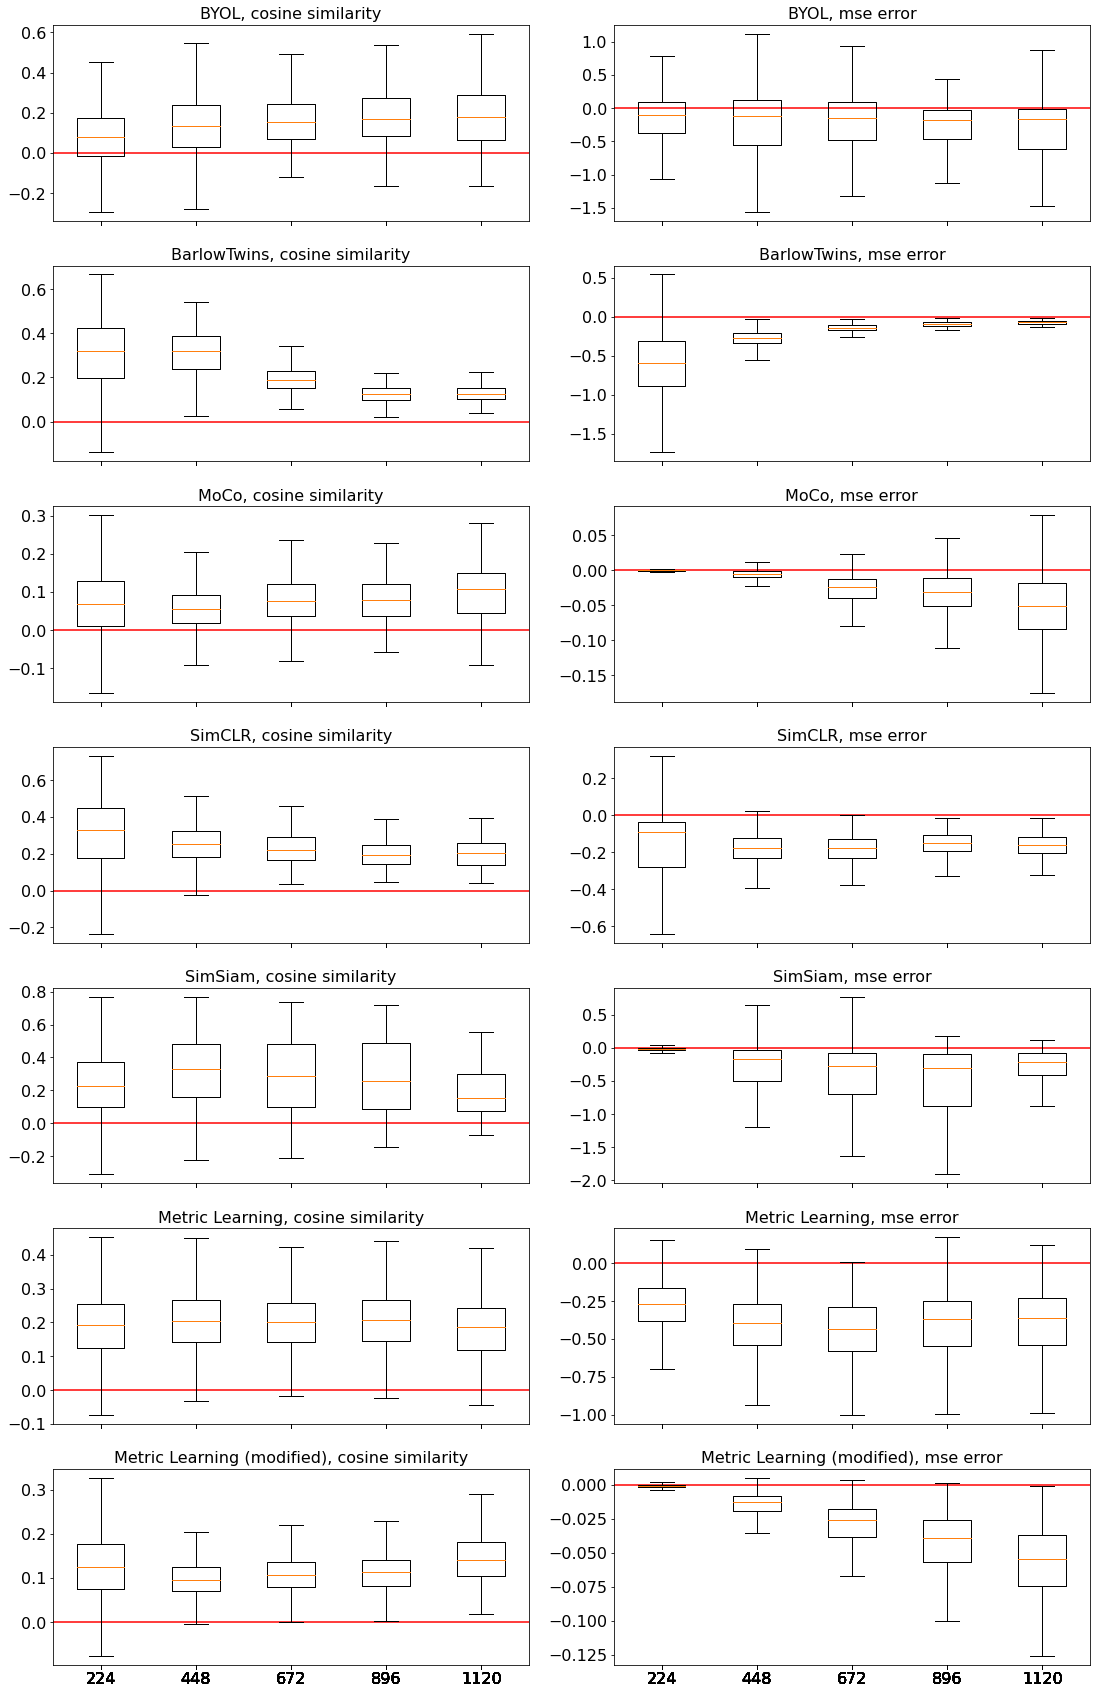

In [103]:
# plot test accuracies for OOD

fig, axs = plt.subplots(nrows=7, ncols=2, sharex=True,
                                    figsize=(16, 24))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', titlesize=16) 
fig.tight_layout(pad=3.0)

LOC = 'Central_Valley'

# Cos Sim

MODEL = 'BYOL'

axs[0,0].set_title('BYOL, cosine similarity')
axs[0,0].hlines([0], 0.5,5.5, color='r')
axs[0,0].boxplot([
    data_coll[LOC][MODEL][224]['positive']['cos']-data_coll[LOC][MODEL][224]['negative']['cos'],
    data_coll[LOC][MODEL][448]['positive']['cos']-data_coll[LOC][MODEL][448]['negative']['cos'],
    data_coll[LOC][MODEL][672]['positive']['cos']-data_coll[LOC][MODEL][672]['negative']['cos'],
    data_coll[LOC][MODEL][896]['positive']['cos']-data_coll[LOC][MODEL][896]['negative']['cos'],
    data_coll[LOC][MODEL][1120]['positive']['cos']-data_coll[LOC][MODEL][1120]['negative']['cos']
], labels=['224', '448', '672', '896', '1120'] , sym='')

MODEL = 'BarlowTwins'

axs[1,0].set_title('BarlowTwins, cosine similarity')
axs[1,0].hlines([0], 0.5,5.5, color='r')
axs[1,0].boxplot([
    data_coll[LOC][MODEL][224]['positive']['cos']-data_coll[LOC][MODEL][224]['negative']['cos'],
    data_coll[LOC][MODEL][448]['positive']['cos']-data_coll[LOC][MODEL][448]['negative']['cos'],
    data_coll[LOC][MODEL][672]['positive']['cos']-data_coll[LOC][MODEL][672]['negative']['cos'],
    data_coll[LOC][MODEL][896]['positive']['cos']-data_coll[LOC][MODEL][896]['negative']['cos'],
    data_coll[LOC][MODEL][1120]['positive']['cos']-data_coll[LOC][MODEL][1120]['negative']['cos']
], labels=['224', '448', '672', '896', '1120'] , sym='')

MODEL = 'MoCo'

axs[2,0].set_title('MoCo, cosine similarity')
axs[2,0].hlines([0], 0.5,5.5, color='r')
axs[2,0].boxplot([
    data_coll[LOC][MODEL][224]['positive']['cos']-data_coll[LOC][MODEL][224]['negative']['cos'],
    data_coll[LOC][MODEL][448]['positive']['cos']-data_coll[LOC][MODEL][448]['negative']['cos'],
    data_coll[LOC][MODEL][672]['positive']['cos']-data_coll[LOC][MODEL][672]['negative']['cos'],
    data_coll[LOC][MODEL][896]['positive']['cos']-data_coll[LOC][MODEL][896]['negative']['cos'],
    data_coll[LOC][MODEL][1120]['positive']['cos']-data_coll[LOC][MODEL][1120]['negative']['cos']
], labels=['224', '448', '672', '896', '1120'] , sym='')

MODEL = 'SimCLR'

axs[3,0].set_title('SimCLR, cosine similarity')
axs[3,0].hlines([0], 0.5,5.5, color='r')
axs[3,0].boxplot([
    data_coll[LOC][MODEL][224]['positive']['cos']-data_coll[LOC][MODEL][224]['negative']['cos'],
    data_coll[LOC][MODEL][448]['positive']['cos']-data_coll[LOC][MODEL][448]['negative']['cos'],
    data_coll[LOC][MODEL][672]['positive']['cos']-data_coll[LOC][MODEL][672]['negative']['cos'],
    data_coll[LOC][MODEL][896]['positive']['cos']-data_coll[LOC][MODEL][896]['negative']['cos'],
    data_coll[LOC][MODEL][1120]['positive']['cos']-data_coll[LOC][MODEL][1120]['negative']['cos']
], labels=['224', '448', '672', '896', '1120'] , sym='')

MODEL = 'SimSiam'

axs[4,0].set_title('SimSiam, cosine similarity')
axs[4,0].hlines([0], 0.5,5.5, color='r')
axs[4,0].boxplot([
    data_coll[LOC][MODEL][224]['positive']['cos']-data_coll[LOC][MODEL][224]['negative']['cos'],
    data_coll[LOC][MODEL][448]['positive']['cos']-data_coll[LOC][MODEL][448]['negative']['cos'],
    data_coll[LOC][MODEL][672]['positive']['cos']-data_coll[LOC][MODEL][672]['negative']['cos'],
    data_coll[LOC][MODEL][896]['positive']['cos']-data_coll[LOC][MODEL][896]['negative']['cos'],
    data_coll[LOC][MODEL][1120]['positive']['cos']-data_coll[LOC][MODEL][1120]['negative']['cos']
], labels=['224', '448', '672', '896', '1120'], sym='')

MODEL = 'Triplet'

axs[5,0].set_title('Metric Learning, cosine similarity')
axs[5,0].hlines([0], 0.5,5.5, color='r')
axs[5,0].boxplot([
    data_coll[LOC][MODEL][224]['positive']['cos']-data_coll[LOC][MODEL][224]['negative']['cos'],
    data_coll[LOC][MODEL][448]['positive']['cos']-data_coll[LOC][MODEL][448]['negative']['cos'],
    data_coll[LOC][MODEL][672]['positive']['cos']-data_coll[LOC][MODEL][672]['negative']['cos'],
    data_coll[LOC][MODEL][896]['positive']['cos']-data_coll[LOC][MODEL][896]['negative']['cos'],
    data_coll[LOC][MODEL][1120]['positive']['cos']-data_coll[LOC][MODEL][1120]['negative']['cos']
], labels=['224', '448', '672', '896', '1120'] , sym='')

MODEL = 'TripletBig'

axs[6,0].set_title('Metric Learning (modified), cosine similarity')
axs[6,0].hlines([0], 0.5,5.5, color='r')
axs[6,0].boxplot([
    data_coll[LOC][MODEL][224]['positive']['cos']-data_coll[LOC][MODEL][224]['negative']['cos'],
    data_coll[LOC][MODEL][448]['positive']['cos']-data_coll[LOC][MODEL][448]['negative']['cos'],
    data_coll[LOC][MODEL][672]['positive']['cos']-data_coll[LOC][MODEL][672]['negative']['cos'],
    data_coll[LOC][MODEL][896]['positive']['cos']-data_coll[LOC][MODEL][896]['negative']['cos'],
    data_coll[LOC][MODEL][1120]['positive']['cos']-data_coll[LOC][MODEL][1120]['negative']['cos']
], labels=['224', '448', '672', '896', '1120'] , sym='')

# MSE err

MODEL = 'BYOL'

axs[0,1].set_title('BYOL, mse error')
axs[0,1].hlines([0], 0.5,5.5, color='r')
axs[0,1].boxplot([
    data_coll[LOC][MODEL][224]['positive']['mse']-data_coll[LOC][MODEL][224]['negative']['mse'],
    data_coll[LOC][MODEL][448]['positive']['mse']-data_coll[LOC][MODEL][448]['negative']['mse'],
    data_coll[LOC][MODEL][672]['positive']['mse']-data_coll[LOC][MODEL][672]['negative']['mse'],
    data_coll[LOC][MODEL][896]['positive']['mse']-data_coll[LOC][MODEL][896]['negative']['mse'],
    data_coll[LOC][MODEL][1120]['positive']['mse']-data_coll[LOC][MODEL][1120]['negative']['mse']
], labels=['224', '448', '672', '896', '1120'] , sym='')

MODEL = 'BarlowTwins'

axs[1,1].set_title('BarlowTwins, mse error')
axs[1,1].hlines([0], 0.5,5.5, color='r')
axs[1,1].boxplot([
    data_coll[LOC][MODEL][224]['positive']['mse']-data_coll[LOC][MODEL][224]['negative']['mse'],
    data_coll[LOC][MODEL][448]['positive']['mse']-data_coll[LOC][MODEL][448]['negative']['mse'],
    data_coll[LOC][MODEL][672]['positive']['mse']-data_coll[LOC][MODEL][672]['negative']['mse'],
    data_coll[LOC][MODEL][896]['positive']['mse']-data_coll[LOC][MODEL][896]['negative']['mse'],
    data_coll[LOC][MODEL][1120]['positive']['mse']-data_coll[LOC][MODEL][1120]['negative']['mse']
], labels=['224', '448', '672', '896', '1120'] , sym='')

MODEL = 'MoCo'

axs[2,1].set_title('MoCo, mse error')
axs[2,1].hlines([0], 0.5,5.5, color='r')
axs[2,1].boxplot([
    data_coll[LOC][MODEL][224]['positive']['mse']-data_coll[LOC][MODEL][224]['negative']['mse'],
    data_coll[LOC][MODEL][448]['positive']['mse']-data_coll[LOC][MODEL][448]['negative']['mse'],
    data_coll[LOC][MODEL][672]['positive']['mse']-data_coll[LOC][MODEL][672]['negative']['mse'],
    data_coll[LOC][MODEL][896]['positive']['mse']-data_coll[LOC][MODEL][896]['negative']['mse'],
    data_coll[LOC][MODEL][1120]['positive']['mse']-data_coll[LOC][MODEL][1120]['negative']['mse']
], labels=['224', '448', '672', '896', '1120'] , sym='')

MODEL = 'SimCLR'

axs[3,1].set_title('SimCLR, mse error')
axs[3,1].hlines([0], 0.5,5.5, color='r')
axs[3,1].boxplot([
    data_coll[LOC][MODEL][224]['positive']['mse']-data_coll[LOC][MODEL][224]['negative']['mse'],
    data_coll[LOC][MODEL][448]['positive']['mse']-data_coll[LOC][MODEL][448]['negative']['mse'],
    data_coll[LOC][MODEL][672]['positive']['mse']-data_coll[LOC][MODEL][672]['negative']['mse'],
    data_coll[LOC][MODEL][896]['positive']['mse']-data_coll[LOC][MODEL][896]['negative']['mse'],
    data_coll[LOC][MODEL][1120]['positive']['mse']-data_coll[LOC][MODEL][1120]['negative']['mse']
], labels=['224', '448', '672', '896', '1120'] , sym='')

MODEL = 'SimSiam'

axs[4,1].set_title('SimSiam, mse error')
axs[4,1].hlines([0], 0.5,5.5, color='r')
axs[4,1].boxplot([
    data_coll[LOC][MODEL][224]['positive']['mse']-data_coll[LOC][MODEL][224]['negative']['mse'],
    data_coll[LOC][MODEL][448]['positive']['mse']-data_coll[LOC][MODEL][448]['negative']['mse'],
    data_coll[LOC][MODEL][672]['positive']['mse']-data_coll[LOC][MODEL][672]['negative']['mse'],
    data_coll[LOC][MODEL][896]['positive']['mse']-data_coll[LOC][MODEL][896]['negative']['mse'],
    data_coll[LOC][MODEL][1120]['positive']['mse']-data_coll[LOC][MODEL][1120]['negative']['mse']
], labels=['224', '448', '672', '896', '1120'], sym='')

MODEL = 'Triplet'

axs[5,1].set_title('Metric Learning, mse error')
axs[5,1].hlines([0], 0.5,5.5, color='r')
axs[5,1].boxplot([
    data_coll[LOC][MODEL][224]['positive']['mse']-data_coll[LOC][MODEL][224]['negative']['mse'],
    data_coll[LOC][MODEL][448]['positive']['mse']-data_coll[LOC][MODEL][448]['negative']['mse'],
    data_coll[LOC][MODEL][672]['positive']['mse']-data_coll[LOC][MODEL][672]['negative']['mse'],
    data_coll[LOC][MODEL][896]['positive']['mse']-data_coll[LOC][MODEL][896]['negative']['mse'],
    data_coll[LOC][MODEL][1120]['positive']['mse']-data_coll[LOC][MODEL][1120]['negative']['mse']
], labels=['224', '448', '672', '896', '1120'] , sym='')

MODEL = 'TripletBig'

axs[6,1].set_title('Metric Learning (modified), mse error')
axs[6,1].hlines([0], 0.5,5.5, color='r')
axs[6,1].boxplot([
    data_coll[LOC][MODEL][224]['positive']['mse']-data_coll[LOC][MODEL][224]['negative']['mse'],
    data_coll[LOC][MODEL][448]['positive']['mse']-data_coll[LOC][MODEL][448]['negative']['mse'],
    data_coll[LOC][MODEL][672]['positive']['mse']-data_coll[LOC][MODEL][672]['negative']['mse'],
    data_coll[LOC][MODEL][896]['positive']['mse']-data_coll[LOC][MODEL][896]['negative']['mse'],
    data_coll[LOC][MODEL][1120]['positive']['mse']-data_coll[LOC][MODEL][1120]['negative']['mse']
], labels=['224', '448', '672', '896', '1120'] , sym='')

plt.show()

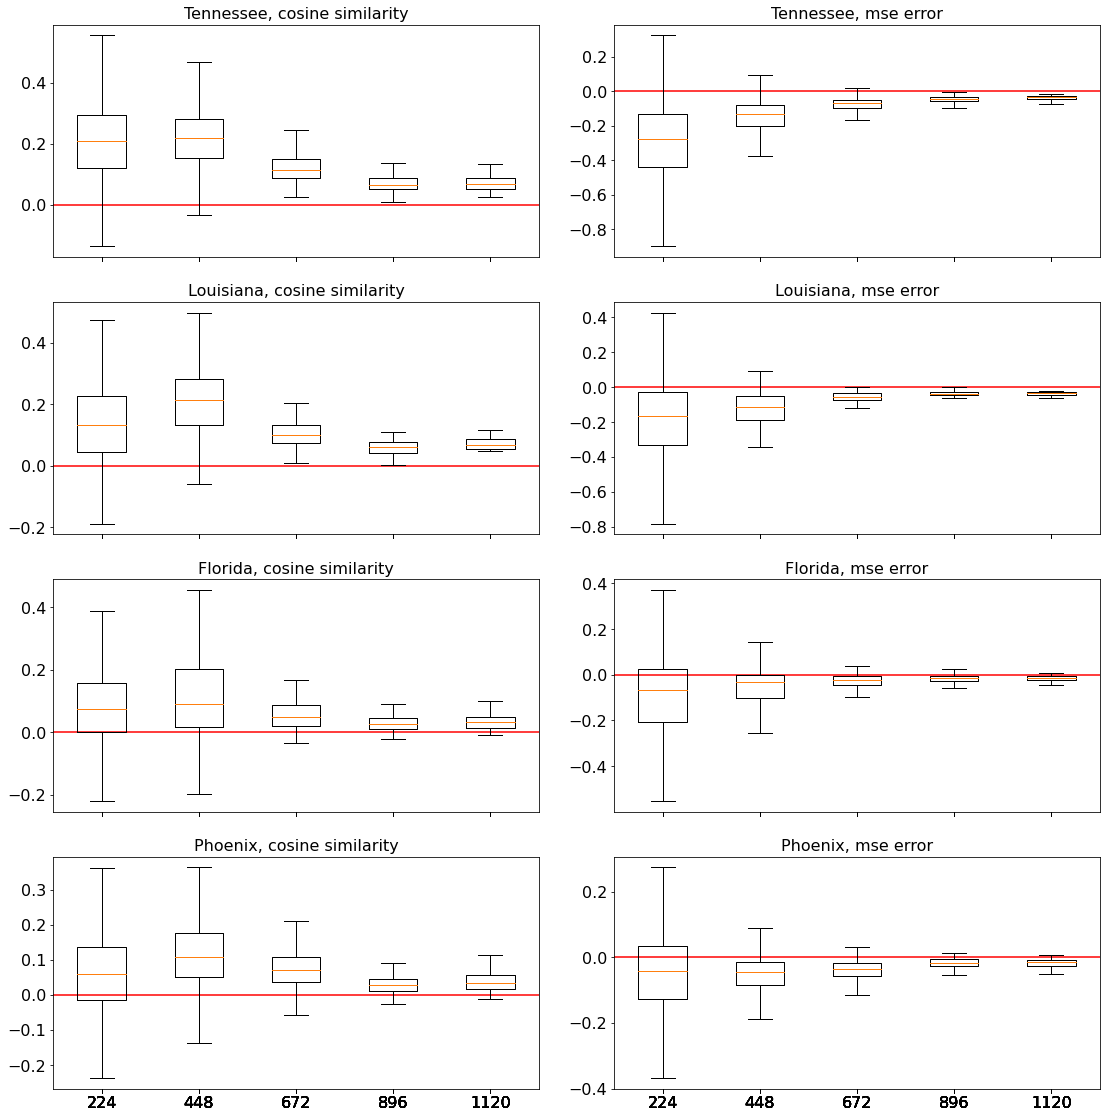

In [104]:
# plot test accuracies for OOD

fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True,
                                    figsize=(16, 16))

fig.tight_layout(pad=3.0)

MODEL = 'BarlowTwins'

# Cos Sim

LOC = 'Tennessee'

axs[0,0].set_title('Tennessee, cosine similarity')
axs[0,0].hlines([0], 0.5,5.5, color='r')
axs[0,0].boxplot([
    data_coll[LOC][MODEL][224]['positive']['cos']-data_coll[LOC][MODEL][224]['negative']['cos'],
    data_coll[LOC][MODEL][448]['positive']['cos']-data_coll[LOC][MODEL][448]['negative']['cos'],
    data_coll[LOC][MODEL][672]['positive']['cos']-data_coll[LOC][MODEL][672]['negative']['cos'],
    data_coll[LOC][MODEL][896]['positive']['cos']-data_coll[LOC][MODEL][896]['negative']['cos'],
    data_coll[LOC][MODEL][1120]['positive']['cos']-data_coll[LOC][MODEL][1120]['negative']['cos']
], labels=['224', '448', '672', '896', '1120'] , sym='')

LOC = 'Louisiana'

axs[1,0].set_title('Louisiana, cosine similarity')
axs[1,0].hlines([0], 0.5,5.5, color='r')
axs[1,0].boxplot([
    data_coll[LOC][MODEL][224]['positive']['cos']-data_coll[LOC][MODEL][224]['negative']['cos'],
    data_coll[LOC][MODEL][448]['positive']['cos']-data_coll[LOC][MODEL][448]['negative']['cos'],
    data_coll[LOC][MODEL][672]['positive']['cos']-data_coll[LOC][MODEL][672]['negative']['cos'],
    data_coll[LOC][MODEL][896]['positive']['cos']-data_coll[LOC][MODEL][896]['negative']['cos'],
    data_coll[LOC][MODEL][1120]['positive']['cos']-data_coll[LOC][MODEL][1120]['negative']['cos']
], labels=['224', '448', '672', '896', '1120'] , sym='')

LOC = 'Florida'

axs[2,0].set_title('Florida, cosine similarity')
axs[2,0].hlines([0], 0.5,5.5, color='r')
axs[2,0].boxplot([
    data_coll[LOC][MODEL][224]['positive']['cos']-data_coll[LOC][MODEL][224]['negative']['cos'],
    data_coll[LOC][MODEL][448]['positive']['cos']-data_coll[LOC][MODEL][448]['negative']['cos'],
    data_coll[LOC][MODEL][672]['positive']['cos']-data_coll[LOC][MODEL][672]['negative']['cos'],
    data_coll[LOC][MODEL][896]['positive']['cos']-data_coll[LOC][MODEL][896]['negative']['cos'],
    data_coll[LOC][MODEL][1120]['positive']['cos']-data_coll[LOC][MODEL][1120]['negative']['cos']
], labels=['224', '448', '672', '896', '1120'] , sym='')

LOC = 'Phoenix'

axs[3,0].set_title('Phoenix, cosine similarity')
axs[3,0].hlines([0], 0.5,5.5, color='r')
axs[3,0].boxplot([
    data_coll[LOC][MODEL][224]['positive']['cos']-data_coll[LOC][MODEL][224]['negative']['cos'],
    data_coll[LOC][MODEL][448]['positive']['cos']-data_coll[LOC][MODEL][448]['negative']['cos'],
    data_coll[LOC][MODEL][672]['positive']['cos']-data_coll[LOC][MODEL][672]['negative']['cos'],
    data_coll[LOC][MODEL][896]['positive']['cos']-data_coll[LOC][MODEL][896]['negative']['cos'],
    data_coll[LOC][MODEL][1120]['positive']['cos']-data_coll[LOC][MODEL][1120]['negative']['cos']
], labels=['224', '448', '672', '896', '1120'] , sym='')


# MSE err

LOC = 'Tennessee'

axs[0,1].set_title('Tennessee, mse error')
axs[0,1].hlines([0], 0.5,5.5, color='r')
axs[0,1].boxplot([
    data_coll[LOC][MODEL][224]['positive']['mse']-data_coll[LOC][MODEL][224]['negative']['mse'],
    data_coll[LOC][MODEL][448]['positive']['mse']-data_coll[LOC][MODEL][448]['negative']['mse'],
    data_coll[LOC][MODEL][672]['positive']['mse']-data_coll[LOC][MODEL][672]['negative']['mse'],
    data_coll[LOC][MODEL][896]['positive']['mse']-data_coll[LOC][MODEL][896]['negative']['mse'],
    data_coll[LOC][MODEL][1120]['positive']['mse']-data_coll[LOC][MODEL][1120]['negative']['mse']
], labels=['224', '448', '672', '896', '1120'] , sym='')

LOC = 'Louisiana'

axs[1,1].set_title('Louisiana, mse error')
axs[1,1].hlines([0], 0.5,5.5, color='r')
axs[1,1].boxplot([
    data_coll[LOC][MODEL][224]['positive']['mse']-data_coll[LOC][MODEL][224]['negative']['mse'],
    data_coll[LOC][MODEL][448]['positive']['mse']-data_coll[LOC][MODEL][448]['negative']['mse'],
    data_coll[LOC][MODEL][672]['positive']['mse']-data_coll[LOC][MODEL][672]['negative']['mse'],
    data_coll[LOC][MODEL][896]['positive']['mse']-data_coll[LOC][MODEL][896]['negative']['mse'],
    data_coll[LOC][MODEL][1120]['positive']['mse']-data_coll[LOC][MODEL][1120]['negative']['mse']
], labels=['224', '448', '672', '896', '1120'] , sym='')

LOC = 'Florida'

axs[2,1].set_title('Florida, mse error')
axs[2,1].hlines([0], 0.5,5.5, color='r')
axs[2,1].boxplot([
    data_coll[LOC][MODEL][224]['positive']['mse']-data_coll[LOC][MODEL][224]['negative']['mse'],
    data_coll[LOC][MODEL][448]['positive']['mse']-data_coll[LOC][MODEL][448]['negative']['mse'],
    data_coll[LOC][MODEL][672]['positive']['mse']-data_coll[LOC][MODEL][672]['negative']['mse'],
    data_coll[LOC][MODEL][896]['positive']['mse']-data_coll[LOC][MODEL][896]['negative']['mse'],
    data_coll[LOC][MODEL][1120]['positive']['mse']-data_coll[LOC][MODEL][1120]['negative']['mse']
], labels=['224', '448', '672', '896', '1120'] , sym='')

LOC = 'Phoenix'

axs[3,1].set_title('Phoenix, mse error')
axs[3,1].hlines([0], 0.5,5.5, color='r')
axs[3,1].boxplot([
    data_coll[LOC][MODEL][224]['positive']['mse']-data_coll[LOC][MODEL][224]['negative']['mse'],
    data_coll[LOC][MODEL][448]['positive']['mse']-data_coll[LOC][MODEL][448]['negative']['mse'],
    data_coll[LOC][MODEL][672]['positive']['mse']-data_coll[LOC][MODEL][672]['negative']['mse'],
    data_coll[LOC][MODEL][896]['positive']['mse']-data_coll[LOC][MODEL][896]['negative']['mse'],
    data_coll[LOC][MODEL][1120]['positive']['mse']-data_coll[LOC][MODEL][1120]['negative']['mse']
], labels=['224', '448', '672', '896', '1120'] , sym='')

plt.show()